In [1]:
import pandas as pd
import numpy as np
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='kaylixe86', api_key='2xETTOyrrgFqZ7iA1uyV')
from plotly import tools
from datetime import datetime
from sklearn import linear_model
import os
import folium
import folium.plugins

In [2]:
import matplotlib     
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

# Introduction

 ## Import data

###  Import Median household income Dataset

In [3]:
with open('MedianHouseholdIncome2015.csv', 'rb') as f:
    result = chardet.detect(f.read())
income =pd.read_csv('MedianHouseholdIncome2015.csv', encoding=result['encoding'])

In [4]:
income.shape

(29322, 3)

In [5]:
income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [6]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
Geographic Area    29322 non-null object
City               29322 non-null object
Median Income      29271 non-null object
dtypes: object(3)
memory usage: 687.3+ KB


### Import Poverty Level Dataset

In [7]:
with open('PercentagePeopleBelowPovertyLevel.csv', 'rb') as f:
    result = chardet.detect(f.read())
poverty =pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding=result['encoding'])

In [8]:
poverty.shape

(29329, 3)

In [9]:
poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [10]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


### Import High School Completion Percentage

In [11]:
with open('PercentOver25CompletedHighSchool.csv', 'rb') as f:
    result = chardet.detect(f.read())
highschool =pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding=result['encoding'])

In [12]:
highschool.shape

(29329, 3)

In [13]:
highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [14]:
highschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


### Import fatal shootings dataset

In [15]:
with open('fatal-police-shootings-data.csv', 'rb') as f:
    result = chardet.detect(f.read())
killings =pd.read_csv('fatal-police-shootings-data.csv', encoding=result['encoding'])

In [16]:
killings.shape

(3932, 14)

In [17]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 14 columns):
id                         3932 non-null int64
name                       3932 non-null object
date                       3932 non-null object
manner_of_death            3932 non-null object
armed                      3682 non-null object
age                        3787 non-null float64
gender                     3929 non-null object
race                       3561 non-null object
city                       3932 non-null object
state                      3932 non-null object
signs_of_mental_illness    3932 non-null bool
threat_level               3932 non-null object
flee                       3794 non-null object
body_camera                3932 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 376.4+ KB


###  Import Race Dataset

In [19]:
with open('ShareRaceByCity.csv', 'rb') as f:
    result = chardet.detect(f.read())
race =pd.read_csv('ShareRaceByCity.csv', encoding=result['encoding'])

In [20]:
race.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [21]:
race.shape

(29268, 7)

In [22]:
race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [23]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


# Data Cleaning

## Clean column names

In [24]:
income.columns = income.columns.str.lower()
poverty.columns = poverty.columns.str.lower()
highschool.columns = highschool.columns.str.lower()
killings.columns = killings.columns.str.lower()
race.columns = race.columns.str.lower()

income.columns =income.columns.str.replace(" ","_")
poverty.columns =poverty.columns.str.replace(" ","_")
highschool.columns = highschool.columns.str.replace(" ","_")
killings.columns = killings.columns.str.replace(" ","_")
race.columns = race.columns.str.replace(" ","_")

## Fix column datatypes 

Currently all columns of the datasets are represented as objects. To properly compute the datasets, numerical columns need to be appropriately converted 

In [25]:
income["median_income"]=income['median_income'].apply(pd.to_numeric, errors='coerce')
poverty["poverty_rate"]=poverty['poverty_rate'].apply(pd.to_numeric, errors='coerce')
highschool["percent_completed_hs"]=highschool['percent_completed_hs'].apply(pd.to_numeric, errors='coerce')
killings["age"]=killings['age'].apply(pd.to_numeric, errors='coerce')
race[["share_white","share_black","share_native_american",
         "share_asian","share_hispanic"]]=race[["share_white","share_black","share_native_american",
         "share_asian","share_hispanic"]].apply(pd.to_numeric, errors='coerce')

## Clean Column Values

In [26]:
city=race["city"]

In [27]:
city = city.map(lambda x : x.strip(" CDP"))
city = city.map(lambda x : x.strip(" city"))
city = city.map(lambda x : x.strip(" town"))

In [28]:
race["city"] = city

## Combine Datasets along common columns

In [29]:
df = pd.merge(income,poverty,on=["geographic_area","city"])

In [30]:
frame = pd.merge(df,highschool,on = ["geographic_area","city"])

In [31]:
frame.head()

,geographic_area,city,median_income,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,11207.0,78.8,21.2
1,AL,Abbeville city,25615.0,29.1,69.1
2,AL,Adamsville city,42575.0,25.5,78.9
3,AL,Addison town,37083.0,30.7,81.4
4,AL,Akron town,21667.0,42.0,68.6


In [32]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29320 entries, 0 to 29319
Data columns (total 5 columns):
geographic_area         29320 non-null object
city                    29320 non-null object
median_income           27383 non-null float64
poverty_rate            29119 non-null float64
percent_completed_hs    29123 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


# Data Exploration

In [33]:
frame["geographic_area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [34]:
len(frame["city"].unique())

24247

# Data Visualization

## Median Income Per State

In [35]:
state_data = income[["geographic_area","median_income"]]
state_geo = os.path.join('us-states.json')

In [36]:
state_data.dropna(axis=0,inplace=True)

In [37]:
state_data.head()

,geographic_area,median_income
0,AL,11207.0
1,AL,25615.0
2,AL,42575.0
3,AL,37083.0
4,AL,21667.0


In [46]:
m = folium.Map(location=[37, -102],tiles = "Stamen Terrain", zoom_start=4.0,
               zoom_control=True, min_zoom=4.0, max_zoom=5.0)

In [49]:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['geographic_area', 'median_income'],
 key_on='feature.id',
 fill_color='YlGnBu',
 position='absolute',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Median Income ($)',
)
folium.LayerControl().add_to(m)
m.save('images/folium_chloropleth_USA.jpg')

In [50]:
m

## Poverty Levels in Relation to High School Completion

In [51]:
mean_vals = frame.groupby(["geographic_area"]).mean()
mean_vals=mean_vals.reset_index()

In [52]:
l= []
y= []
# Setting colors for plot.
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((i))
    p1 = go.Scatter(        
            x= mean_vals['percent_completed_hs'],
            y= mean_vals['poverty_rate'],
            mode='markers',
            marker= dict(size= 14,
                line= dict(width=1),
                color= c[i],
                #opacity= 0.9
            ),
        name= y[i],
        text= mean_vals['geographic_area']
    )
    l.append(p1);

layout = go.Layout(
        title= 'Poverty Level vs High School Completion',
        hovermode= 'closest',
        xaxis=dict(
            ticks='', 
            zeroline=False,
            gridwidth= 2,
            title= '% Completed High School',
            ticklen= 5,
        ),
                   
        yaxis=dict(
            ticks='', 
            zeroline=False,
            title= 'Poverty Rate',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend=False,
        )

fig = go.Figure(data=[p1], layout=layout)
py.image.save_as(fig,"images/poverty_vs_high_school.png")
py.iplot(fig)

### Adding a Regression Line

In [53]:
regr = linear_model.LinearRegression()
regr.fit(mean_vals[["percent_completed_hs"]],mean_vals[["poverty_rate"]])
y1 = regr.predict(mean_vals[["percent_completed_hs"]])

In [54]:
l= []
y= []
# Setting colors for plot.
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((i))
    p1 = go.Scatter(        
            x= mean_vals['percent_completed_hs'],
            y= mean_vals['poverty_rate'],
            mode='markers',
            marker= dict(size= 14,
                line= dict(width=1),
                color= c[i],
                opacity= 0.6
            ),
        name= y[i],
        text= mean_vals['geographic_area']
    )
    l.append(p1);

    p2 = go.Scatter(
            x= mean_vals['percent_completed_hs'], 
            y=y1,
            mode='lines',
            line=dict(
                color='blue', 
                width=3,
            )
    )

layout = go.Layout(
        title= 'Povery Level Vs High School Completion',
        hovermode= 'closest',
        xaxis=dict(
            ticks='', 
            zeroline=False,
            gridwidth= 2,
            title= '% Completed High School',
            ticklen= 5,
        ),
                   
        yaxis=dict(
            ticks='', 
            zeroline=False,
            title= 'Poverty Rate',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend=False,
        )

fig = go.Figure(data=[p1, p2], layout=layout)
py.image.save_as(fig,"images/povert_level_regression.png")
py.iplot(fig)

In [55]:
frame.geographic_area.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [56]:
trace0 = go.Scatter(
    x=mean_vals.geographic_area,
    y=mean_vals.median_income,
    name='Median Income',
    marker=dict(
        color='rgb(49,30,189)'
    )
)
trace1 = go.Scatter(
    x= mean_vals.geographic_area,
    y= mean_vals.percent_completed_hs,
    name='Completed Highschool(%)',
    marker=dict(
        color='rgb(255,0,0)',
    )
)
fig = tools.make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=("Median Income($)","High School Complete(%)"))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig['layout'].update(height=700, width=1000,
                     legend=dict(orientation='h'),xaxis=dict(tickangle=45))
py.image.save_as(fig,"images/income-subplots-shared-yaxes.png")
py.iplot(fig, filename='income-subplots-shared-yaxes')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



## Racial Population in States

In [57]:
race.head()

,geographic_area,city,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville,52.3,44.9,0.5,0.3,2.3
3,AL,Addis,99.1,0.1,0.0,0.1,0.4
4,AL,Akr,13.2,86.5,0.0,0.0,0.3


In [58]:
mean_race =race.groupby(["geographic_area"]).mean()

In [59]:
mean_race.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
geographic_area,,,,,
AK,45.650000,0.567330,45.864773,1.388352,2.149148
AL,72.507266,23.322318,0.659343,0.479758,2.980104
AR,78.449538,16.296858,0.759889,0.477079,4.273013
AZ,59.929047,0.954545,28.589800,0.726608,20.144568
CA,71.866293,2.692018,1.723087,5.568206,29.649868


In [60]:
mean_race.reset_index(inplace=True)

In [61]:
trace1 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_white,
    name='White',
    orientation = 'h',
    marker = dict(
        color = '#ccffcc',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
trace2 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_black,
    name='Black',
    orientation = 'h',
    marker = dict(
        color = '#ffe6ff',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 1)
    )
)
trace3 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_hispanic,
    name='Hispanic',
    orientation = 'h',
    marker = dict(
        color = '#80ffff',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
trace4 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_asian,
    name='Asian',
    orientation = 'h',
    marker = dict(
        color = '#99ffbb',
        line = dict(
            color = 'rgba(158, 71, 80, 1.0)',
            width = 1)
    )
)
trace5 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_native_american,
    name='Native American',
    orientation = 'h',
    marker = dict(
        color = '#ffff99',
        line = dict(
            color = 'rgba(158, 71, 20, 1.0)',
            width = 1)
    )
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(
    showlegend=True,
    height=700,
    margin=go.layout.Margin(
        l=30,
        r=20,
        b=20,
        t=10,
        pad=4
    ),
    yaxis=dict(tickangle=-45),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig,"images/populaton_bar_plot.png")
py.iplot(fig, filename='marker-h-bar')

## Fatal Shootings

### Attribute Distribution

In [62]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


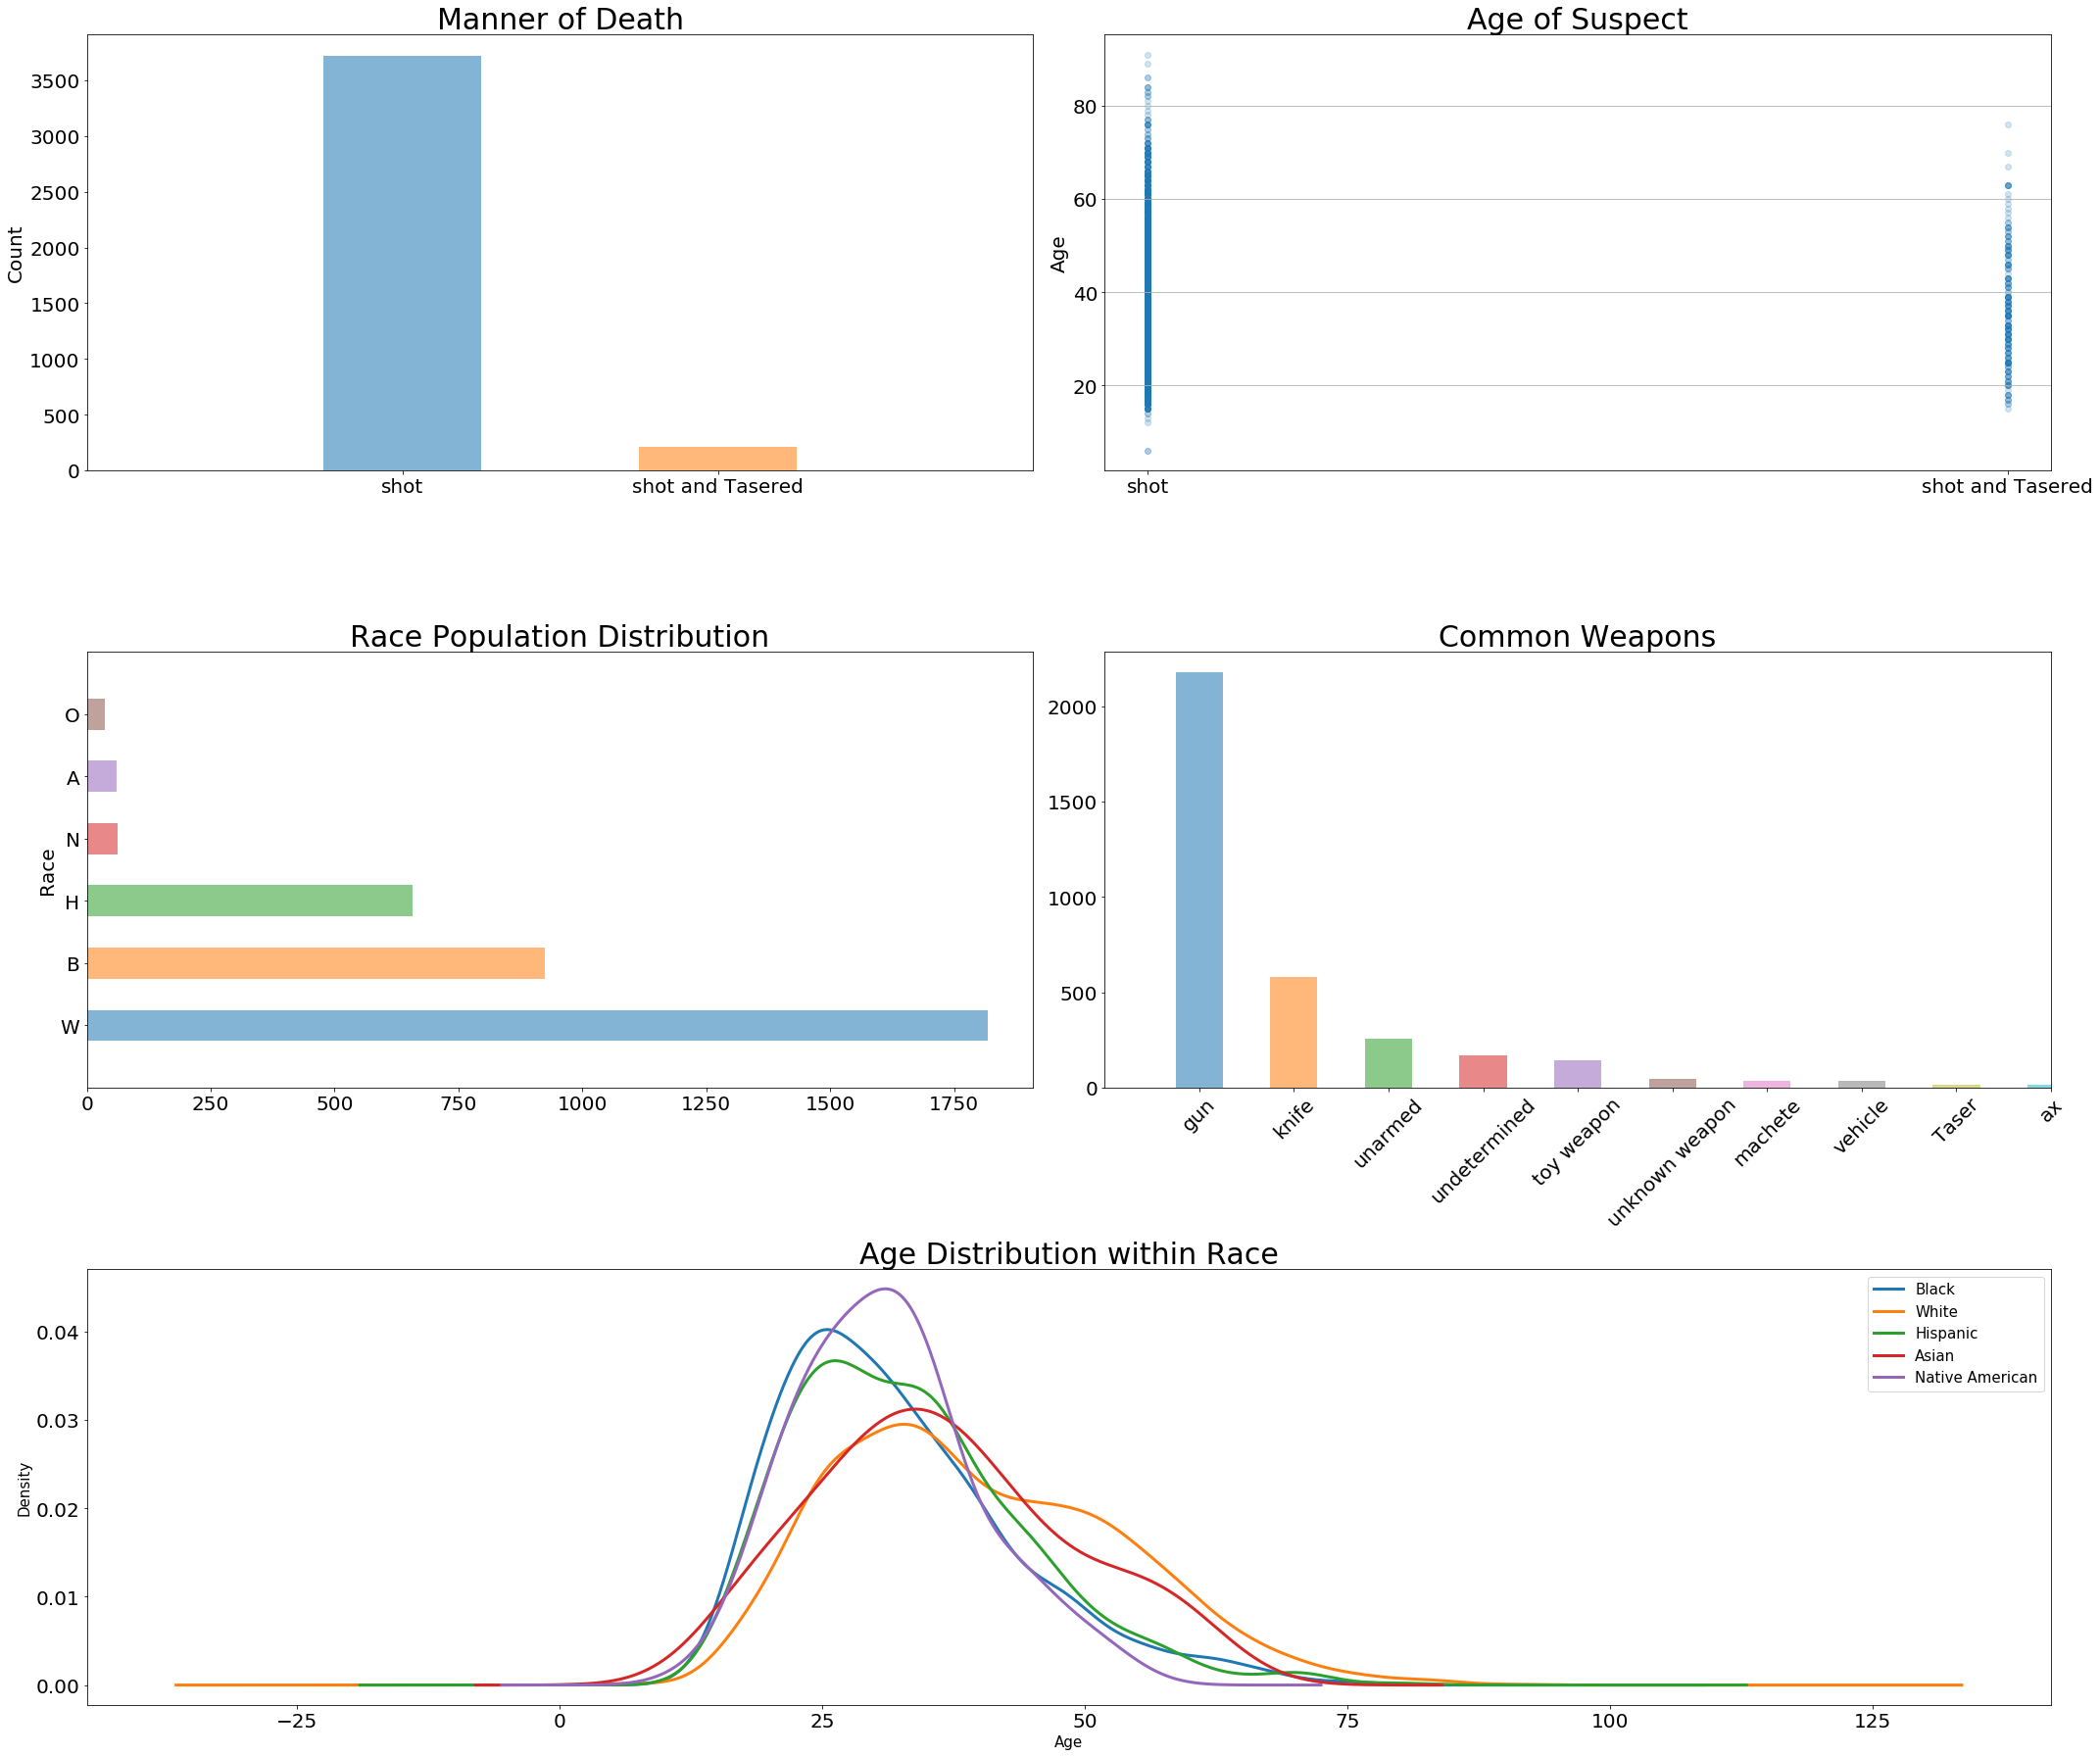

In [63]:
# specifies the parameters of our graphs
N = 100
fig = plt.figure(figsize=(30,25)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55
# lets us plot many diffrent shaped graphs together 

ax1 = plt.subplot2grid((3,2),(0,0))
# plots a bar graph of those who surived vs those who did not.               
killings.manner_of_death.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='horizontal')
# puts a title on our graph
plt.title("Manner of Death", fontsize=30)

plt.subplot2grid((3,2),(0,1))
plt.scatter(killings.manner_of_death, killings.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age",fontsize=20)
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Age of Suspect",fontsize=30)

ax3 = plt.subplot2grid((3,2),(1,0))
killings.race.value_counts().plot(kind="barh",alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(killings.race.value_counts()))
plt.ylabel("Race",fontsize=20)
plt.title("Race Population Distribution",fontsize=30)
#ax3.legend()


ax5 = plt.subplot2grid((3,2),(1,1),colspan=2)
killings.armed.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax5.set_xlim(-1, 9)
plt.xticks(rotation=45)
# specifies the parameters of our graphs
plt.title("Common Weapons",fontsize=30)

plt.subplot2grid((3,2),(2,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
killings.age[killings.race == "B"].plot(kind='kde',linewidth=3)    
killings.age[killings.race =="W"].plot(kind='kde',linewidth=3)
killings.age[killings.race =="H"].plot(kind='kde',linewidth=3)
killings.age[killings.race =="A"].plot(kind='kde',linewidth=3)
killings.age[killings.race =="N"].plot(kind='kde',linewidth=3)
 # plots an axis lable
plt.xlabel("Age",fontsize=15)    
plt.ylabel("Density",fontsize=15) 
plt.title("Age Distribution within Race",fontsize=30)
# sets our legend for our graph.
plt.legend(('Black', 'White','Hispanic',"Asian","Native American"),fontsize=15,loc='best')
plt.savefig("images/distribution_plots.png")
plt.tight_layout()

### Body Camera Usage Over the Years

In [64]:
killings["date"]=killings["date"].map(lambda x : datetime.strptime(x,'%Y-%m-%d'))

In [65]:
killings.set_index(["date"],inplace=True)

In [66]:
usage =[]
b_cam =killings[killings["body_camera"]==True]
usage.append(b_cam[b_cam.index.year ==2015]["body_camera"].sum())
usage.append(b_cam[b_cam.index.year ==2016]["body_camera"].sum())
usage.append(b_cam[b_cam.index.year ==2017]["body_camera"].sum())
usage.append(b_cam[b_cam.index.year ==2018]["body_camera"].sum())

In [67]:
usage

[74, 145, 104, 107]

In [68]:
trace0 = go.Bar(
    y = usage,
    x =["2015","2016","2017","2018"],
    marker = dict(
        color = ['#ccffe6','#ffcccc','#ccccff','#00FFFF'],
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
data = [trace0]
layout = go.Layout(
    title = "Body Camera Usage Between 2015 and 2018",
    showlegend=False,
    height=700,
        yaxis=dict(
        title="Counts",
        tickangle=-45,
    ),
    xaxis=dict(
        title="Year",
        tickangle=-45,
    ),
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig,"images/body_camera.png")
py.iplot(fig, filename='marker-h-bar')

### Gender of Suspects and Manner Death

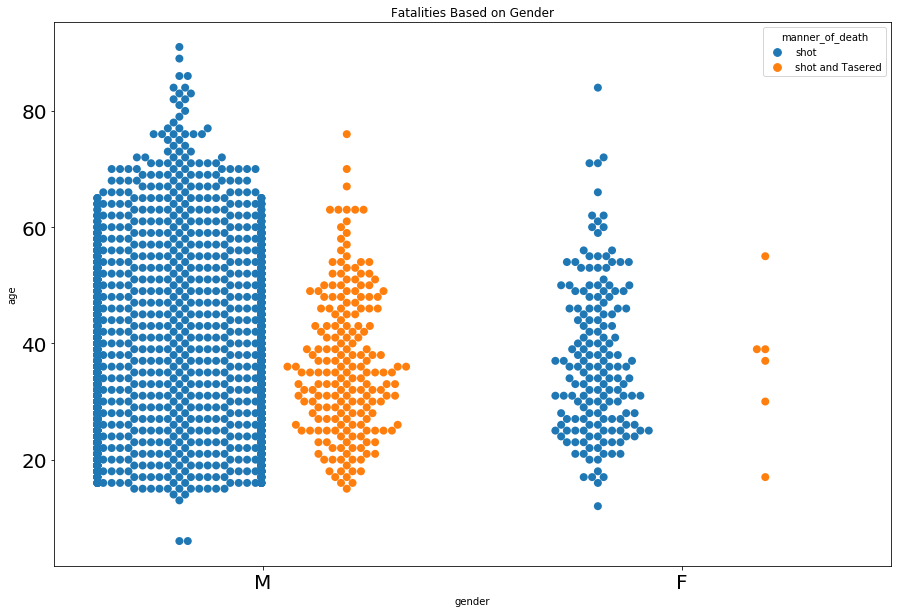

In [69]:
plt.figure(figsize=(15,10))
plt.title("Fatalities Based on Gender")
sns.swarmplot(x = 'gender', y = 'age', hue = 'manner_of_death',size=8,dodge=True,data = killings)
plt.savefig("images/swarm_plot_death.png")

### Fatal Shootings By Racial Population

In [70]:
population = pd.DataFrame(race.iloc[:,2:].sum()).T

In [71]:
population.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
0,2433809.0,199898.6,84094.9,45156.5,272867.9


In [72]:
population["Total"] = population.sum(axis=1)

In [73]:
population

,share_white,share_black,share_native_american,share_asian,share_hispanic,Total
0,2433809.0,199898.6,84094.9,45156.5,272867.9,3035826.9


In [74]:
W =float(np.round((killings[killings["race"]=="W"]["race"].count()/population["share_white"])*100,4))
B =float(np.round((killings[killings["race"]=="B"]["race"].count()/population["share_black"])*100,4))
H =float(np.round((killings[killings["race"]=="H"]["race"].count()/population["share_hispanic"])*100,4))
A =float(np.round((killings[killings["race"]=="A"]["race"].count()/population["share_asian"])*100,4))
N =float(np.round((killings[killings["race"]=="N"]["race"].count()/population["share_native_american"])*100,4))
#O =float(np.round((killings[killings["race"]=="O"]["race"].count()/population["Total"])*100,4))

In [75]:
a =[W,B,H,A,N]

In [76]:
ratio = pd.DataFrame(columns=["white","black","native","asian","hispanic"])

In [77]:
ratio.loc[len(ratio)] = a

In [78]:
ratio

,white,black,native,asian,hispanic
0,0.0747,0.4627,0.2408,0.1351,0.0737


In [79]:
pW =float(np.round((killings[killings["race"]=="W"]["race"].count()/population["Total"])*100,4))
pB =float(np.round((killings[killings["race"]=="B"]["race"].count()/population["Total"])*100,4))
pH =float(np.round((killings[killings["race"]=="H"]["race"].count()/population["Total"])*100,4))
pA =float(np.round((killings[killings["race"]=="A"]["race"].count()/population["Total"])*100,4))
pN =float(np.round((killings[killings["race"]=="N"]["race"].count()/population["Total"])*100,4))

In [80]:
pa =[pW,pB,pH,pA,pN]

In [81]:
pratio = pd.DataFrame(columns=["white","black","native","asian","hispanic"])

In [82]:
pratio.loc[len(ratio)] = pa

In [83]:
pratio

,white,black,native,asian,hispanic
1,0.0599,0.0305,0.0216,0.002,0.002


In [84]:
population = population.drop(["Total"],axis=1)

Text(0.5, 1.0, 'Ratio of Fatal Shootings Within Racial Group')

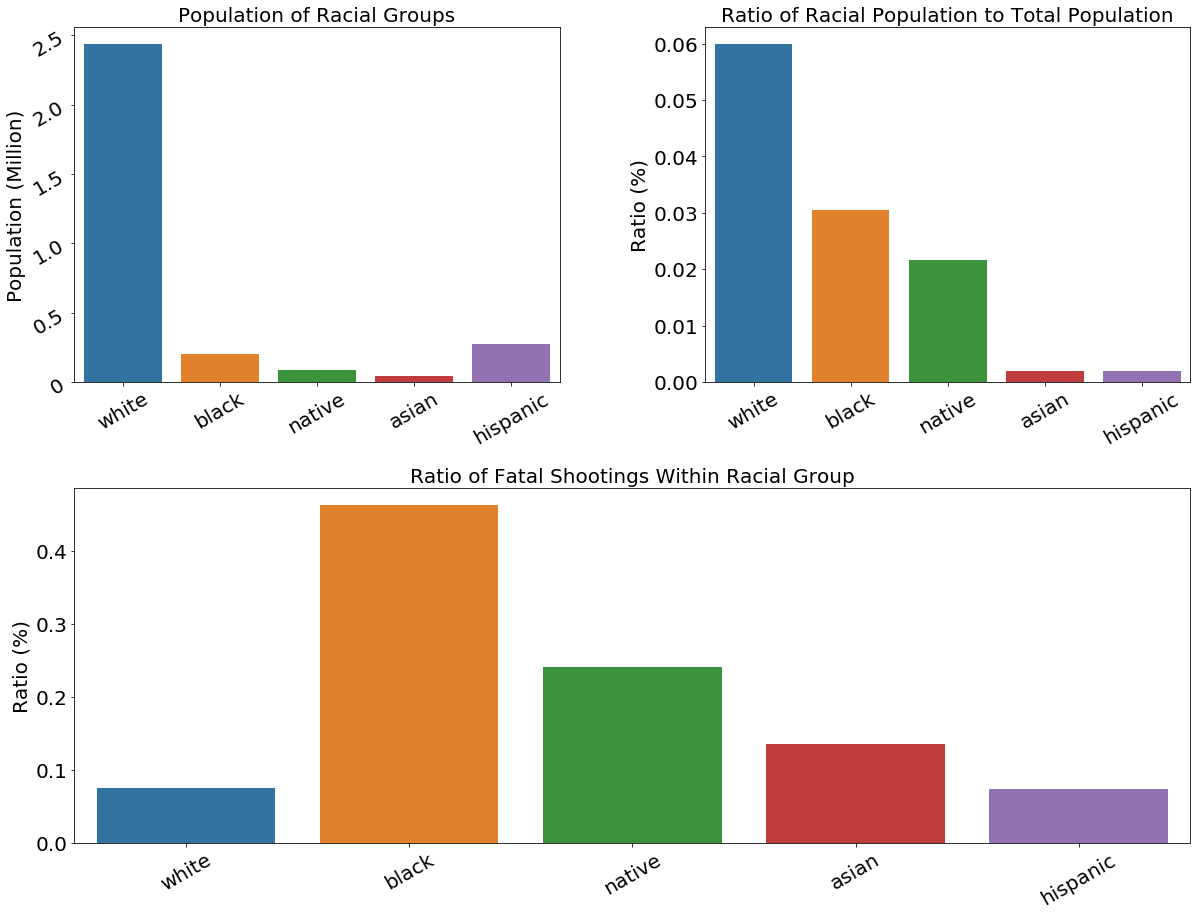

In [123]:
plt.figure(figsize=(20,15))
plt.subplot2grid((2,2),(0,0))
g=sns.barplot(x=population.columns,y=population.values.ravel())
g.set_yticklabels(["0","0.5","1.0","1.5","2.0","2.5"],rotation=30)
g.set_ylabel("Population (Million)",fontsize=20)
g.set_xticklabels(["white","black","native","asian","hispanic"],rotation=30)
g.set_ylabel("Population (Million)",fontsize=20)
plt.title("Population of Racial Groups",fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.subplot2grid((2,2),(0,1))
d=sns.barplot(x=pratio.columns,y=pratio.values.ravel())
d.set_xticklabels(list(pratio.columns),rotation=30)
#d.set_yticklabels(rotation=30)
d.set_ylabel("Ratio (%)",fontsize=20)
plt.title("Ratio of Racial Population to Total Population",fontsize=20)


plt.subplots_adjust(hspace=0.3)
#plt.figure(figsize=(8,13))
plt.subplot2grid((2,2),(1,0),colspan=2,)
p=sns.barplot(x=ratio.columns,y=ratio.values.ravel())
p.set_xticklabels(list(ratio.columns),rotation=30)
#d.set_yticklabels(rotation=30)
p.set_ylabel("Ratio (%)",fontsize=20)
plt.savefig("images/population_ratio.png")
plt.title("Ratio of Fatal Shootings Within Racial Group",fontsize=20)

### Mental Illness Within Groups

In [155]:
d=pd.DataFrame(killings.groupby(["race","signs_of_mental_illness"]).size())
d=d.unstack(0)

In [156]:
d

0                        
race                      A    B    H   N   O     W
signs_of_mental_illness                            
False                    43  784  534  53  28  1276
True                     18  141  123   9   9   543

In [157]:
d = d.reset_index()[0]

In [158]:
#d.drop(["O"],axis=1,inplace=True)

In [159]:
m_false= d.loc[0]
m_true = d.loc[1]

In [160]:
list(m_false.values)

[43, 784, 534, 53, 28, 1276]

In [161]:
trace1 = go.Bar(
    x=list(m_false.index),
    y=list(m_false.values),
    name='No Mental Illness'
)
trace2 = go.Bar(
    x=list(m_true.index),
    y=list(m_true.values),
    name='Signs of Mental Illness'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title="Mental Illness Between Racial Groups",
        yaxis=dict(
            ticks='', 
            zeroline=False,
            gridwidth= 2,
            title= 'Count',
            ticklen= 5,
        ),
        xaxis=dict(
            ticks='', 
            zeroline=False,
            gridwidth= 2,
            title= 'Race',
            ticklen= 5,
        ),
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig, "images/mental_image_plot.png")
py.iplot(fig, filename='grouped-bar')

### Fatal Shootings By City

In [162]:
kil =killings.groupby(["city"]).size()
kil=pd.DataFrame(kil.reset_index())
kil.columns = ["city","count"]
kil = kil.sort_values(["count"],ascending=False)
kil_ten= kil.iloc[0:10]

In [163]:
kil_ten["perc"]=list(np.round((kil_ten["count"]/kil_ten["count"].sum())*100,2).values)

In [164]:
kil_ten

,city,count,perc
1380,Phoenix,59,16.39
1007,Los Angeles,58,16.11
797,Houston,39,10.83
942,Las Vegas,36,10.00
373,Columbus,33,9.17
314,Chicago,31,8.61
1557,San Antonio,28,7.78
19,Albuquerque,28,7.78
1109,Miami,24,6.67
77,Austin,24,6.67


In [165]:
data = [
    {
        'x': kil_ten["city"],
        'y': kil_ten["count"],
        'mode': 'markers',
        'marker': {
            'color': kil_ten["count"],
            'size': [150, 135, 120, 105, 90, 75, 60, 45, 30, 15],
            'showscale': True
        }
    }
]
layout = go.Layout(
        title= 'Number of City Shootings',
        hovermode= 'closest',
        xaxis=dict(
            title = "Cities"
        ),
                   
        yaxis=dict(
            title = "Top Ten Cities with Highest Fatalities"
        ),
        showlegend=False,
        )
fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig,"images/Number_of_city_shootings.png")
py.iplot(fig, filename='scatter-colorscale')